In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

netflix = pd.read_csv('netflix_titles.csv')
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Data Cleaning and Handling Missing values

In [84]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [85]:
#check for missing values
round(100*netflix.isnull().sum()/len(netflix.index),2)

show_id          0.00
type             0.00
title            0.00
director        31.58
cast             9.14
country          7.64
date_added       0.18
release_year     0.00
rating           0.16
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

*Showid is a unique value and cant be used for analysis. Hence that can be dropped*

In [86]:
netflix.drop(['show_id'], axis=1,inplace=True)
netflix.head(0)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*Columns `date_added` and `rating` has lower missing values hence it can be dropped*

In [87]:
netflix = netflix[~netflix.date_added.isnull()].copy()
netflix = netflix[~netflix.rating.isnull()].copy()

*Now we have three columns `director`, `cast`,`country` with missing values and it should be handled*

In [88]:
netflix.country.describe()

count              5743
unique              554
top       United States
freq               2023
Name: country, dtype: object

*Since the frequency of country is so high, we can impute 'United States' for missing values*

In [89]:
netflix.country.fillna('United States', inplace=True)

*For columns `cast` and `director` missing values cannot be imputed with frequent one's. So, create a new category 'Missing' for them*

In [90]:
netflix.cast = netflix['cast'].replace(np.NaN, 'Missing')
netflix.director = netflix['director'].replace(np.NaN, 'Missing')

In [91]:
#check for missing values
round(100*netflix.isnull().sum()/len(netflix.index),2)

type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

*Date_added column is stored as object and it can be changed as date type*

In [92]:
netflix['date_added']= pd.to_datetime(netflix['date_added'])

In [93]:
netflix['year_added']= netflix['date_added'].dt.year

In [94]:
netflix.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,Movie,Jandino: Whatever it Takes,Missing,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,TV Show,Transformers Prime,Missing,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,TV Show,Transformers: Robots in Disguise,Missing,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


*Change the duration to hold only minutes*

In [95]:
netflix['noofseason'] = netflix.duration.apply(lambda x: x.split(' ')[0] if 'Season' in x else "")
netflix['duration']  = netflix.duration.apply(lambda x: x.split(' ')[0] if 'Season' not in x else "")

In [96]:
netflix.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,noofseason
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,
1,Movie,Jandino: Whatever it Takes,Missing,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,
2,TV Show,Transformers Prime,Missing,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018,1
3,TV Show,Transformers: Robots in Disguise,Missing,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,1
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017,


*Hence the data is clean and can be used for Analysis*

### Univariate Analysis

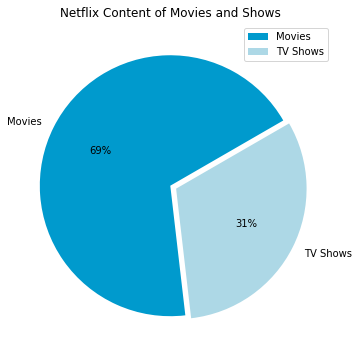

In [97]:
var = netflix.type.value_counts(normalize=True)
plt.figure(figsize=(6,6))
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
plt.pie(var,explode=[0,0.05], labels=['Movies', 'TV Shows'], colors=color_palette_list[0:2],startangle=30,autopct='%1.0F%%')
plt.title('Netflix Content of Movies and Shows')
plt.legend(['Movies', 'TV Shows'], loc='upper right')
plt.show()

*It shows around 70% of netflix contents are Movies*